# Plot for figure 2: gene-gene expression correlation values vs distance (bp)

In [1]:
using CSV
using DataFrames
using DataFramesMeta
using DelimitedFiles 
using FileIO 
using LinearAlgebra 
using Lazy
using Plots
using Query
using Random
using Statistics
using StatsBase
using StatsPlots

In [2]:
include("PlottingTools.jl") #Loading functions used to compute different properties for plotting.

get_genes_ch (generic function with 1 method)

## Expression data can be downloaded with the script "download-data.sh" in the repository or each file separately from this source:

http://espinal3.inmegen.gob.mx:5270/genecorr/Expression 

## Data for the biomart  is in the folder "Data" in the repository

In [3]:
#replace "ExpressionData" with the path for the folder where the data is.
Healthy_data = readdlm("ExpressionData/Healthy-All.txt")
Basal_data = readdlm("ExpressionData/Basal-All.txt")
LumA_data = readdlm("ExpressionData/LumA-All.txt")
LumB_data = readdlm("ExpressionData/LumB-All.txt")
Her2_data = readdlm("ExpressionData/Her2-All.txt")
genes_data = readdlm("ExpressionData/biomart-20190718.txt",'\t');

In [4]:
gene_tags = Healthy_data[:,1];
chs = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"];

In [5]:
gene_table = get_genes_ch(gene_tags, genes_data);

In [6]:
#getting the name of genes and position for the chromosome ch=8
ch = 8 #it can be any other chromosome.
ch_table = gene_table[findall(x-> x==ch, gene_table[:,3]),:];

In [7]:
#Gene expressions for the chromosome 8
Healthy_ch = Healthy_data[map(y-> findfirst(x-> x==y, Healthy_data[:,1]), ch_table[:,1]),:]
Basal_ch = Basal_data[map(y-> findfirst(x-> x==y, Basal_data[:,1]), ch_table[:,1]),:]
Her2_ch = Her2_data[map(y-> findfirst(x-> x==y, Her2_data[:,1]), ch_table[:,1]),:]
LumA_ch = LumA_data[map(y-> findfirst(x-> x==y, LumA_data[:,1]), ch_table[:,1]),:]
LumB_ch = LumB_data[map(y-> findfirst(x-> x==y, LumB_data[:,1]), ch_table[:,1]),:];

In [8]:
#computing the pearson's correlation for each pair of genes in chromosome 8
Healthy_cor = get_gene_cor(Healthy_ch)
Basal_cor = get_gene_cor(Basal_ch)
Her2_cor = get_gene_cor(Her2_ch)
LumA_cor = get_gene_cor(LumA_ch)
LumB_cor = get_gene_cor(LumB_ch);

In [9]:
Healthy_null = get_gene_null(Healthy_ch)
Basal_null = get_gene_null(Basal_ch)
Her2_null = get_gene_null(Her2_ch)
LumA_null = get_gene_null(LumA_ch)
LumB_null = get_gene_null(LumB_ch);

In [10]:
#loading backend for plotting
using LaTeXStrings
pyplot(guidefont=30, titlefont=30,xtickfont=30, ytickfont=30, legendfont=30)

Plots.PyPlotBackend()

In [11]:
# constructing the plot
cor_plot = get_plot_cor(Basal_cor, Basal_null);

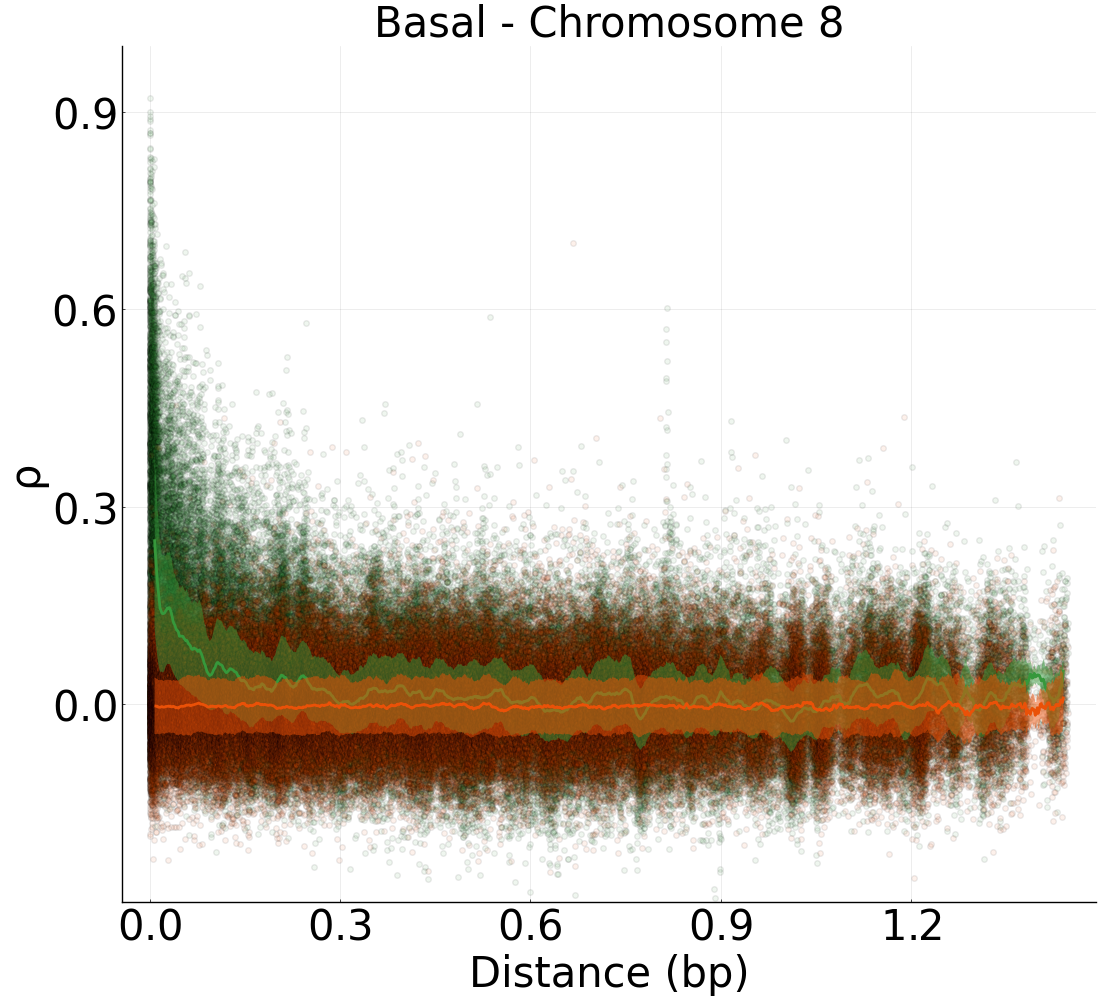

In [12]:
#plotting the output
plot(cor_plot, title = "Basal - Chromosome 8",
    xlabel="Distance (bp)",
    ylabel="ρ"
)